# Analiza vin

V zvezku so predstavljeni rezultati analize podatkov o vinu s strani Wine Library.

## Uvoz in predobdelava

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
vina = pd.read_csv('obdelani_podatki/vina.csv')
detajli = pd.read_csv('obdelani_podatki/detajli.csv')
okusi = pd.read_csv('obdelani_podatki/okusi.csv')
vonjave = pd.read_csv('obdelani_podatki/vonjave.csv')

In [3]:
# tabela master je največja - vsebuje vse naše podatke
senses = pd.merge(okusi, vonjave)
vina_senses = pd.merge(vina, senses)
master = pd.merge(vina_senses, detajli).set_index('id')
master

,leto,ime,sorta,drzava,velikost,znizana_cena,cena,ocena,ocenjevalec,okus,vonj,regija,podregija,barva,alkohol,zamasek,opis,recenzija,popularnost
id,,,,,,,,,,,,,,,,,,,
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,violet,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,rose,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,petal,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,oak,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,smoke,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,blackberry,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425
115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,cherry,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425
115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,cedar,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425


In [4]:
# ker se v master vina ponavljajo, naredimo še tabelo brez okusov in vonjav, 
# ki je bolj sprejemljive velikosti
vina = pd.merge(vina, detajli).set_index('id')
vina

,leto,ime,sorta,drzava,velikost,znizana_cena,cena,ocena,ocenjevalec,regija,podregija,barva,alkohol,zamasek,opis,recenzija,popularnost
id,,,,,,,,,,,,,,,,,
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
118777,2019.0,Vina Gonzalez Bastias Naranjo Valle De Maule (...,Blend,Chile,750,29.99,34.99,NaN,NaN,Central Valley,Maule,Orange,13.0,Cork,"A blend of Moscatel, Torrontel and País. The M...",NaN,1427
119906,2019.0,Izadi Rioja Bianco,Blend,Spain,750,19.99,25.00,NaN,NaN,La Rioja,Rioja,White,13.5,Cork,Straw yellow in colour with bright green tones...,NaN,1428
114983,2016.0,Lamy Pillot Morgeot Chassagne Montrachet,Pinot Noir,France,750,44.99,60.00,NaN,NaN,Burgundy,Chassagne Montrachet,Red,13.0,Cork,A wine as good as many 1er crus from their nei...,NaN,1429
118255,2018.0,Jules Pierre Macon Villages,Chardonnay,France,750,19.99,25.00,NaN,NaN,Burgundy,Macon-Villages,White,12.5,Cork,Fresh and fruit-driven white wine capturing th...,NaN,1430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112603,2017.0,Giraud Les Grenaches De Pierre Chateauneuf Du ...,Grenache / Garnacha,France,750,99.99,162.99,96.0,Joe Czerwinski - Robert Parker&#39;s Wine Advo...,Rhone,Chateauneuf du Pape,Red,15.5,Cork,NaN,"Full-bodied yet silky, elegant and positively ...",1421
112025,2015.0,Philippe Gimel St Jean Du Barroux L'argile,Blend,France,750,26.80,34.99,93.0,Jeb Dunnuck - jebdunnuck.com,Rhone,Cotes du Ventoux,Red,14.5,Cork,NaN,"The 2015 L'Argile spent 24 months in concrete,...",1422
118326,2017.0,Pichler Krutzler Klostersatz Gruner Veltliner,Gruner Veltliner,Austria,750,27.99,35.00,92.0,Wine Enthusiast,Niederosterreich-Lower Austria,Wachau,White,12.5,Screwtop,Pichler-Krutzler from Austria’s famed Wachau r...,Reduction and yeast vie for attention with rou...,1423


## Analiza

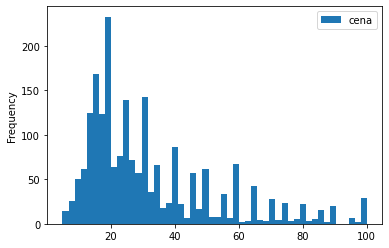

In [5]:
# popularsnost cen (pod 100)
vina[vina.cena <= 100].plot.hist(y='cena', bins=50);

Za začetek enostavno pogledamo kako so porazdeljene cene na strani. Višjih cen od 100 EUR ne upoštevamo, saj popačijo izgled. Vidimo, da se cene v večini gibljejo med 15 in 35 EUR ter da so cene rade zaokrožene - kot je vidno iz velikih skokov pri okroglih številih.

### Popularnost in ocene

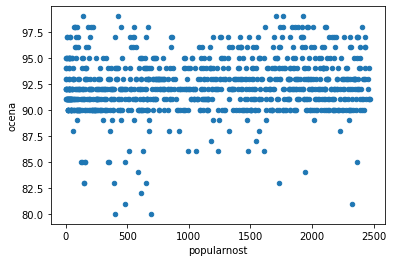

In [6]:
vina[vina.ocena > 10].plot.scatter(x='popularnost', y='ocena');
# stran damo ocene, manjše od 10, saj uporabljajo drugačno lestvico

Vidimo, da ni pretirane povezave med popularnostjo vina in njegovo oceno. To je verjetno posledica tega, da prodajalna Wine Library prodaja večinoma samo kvalitetna in dobro ocenjena vina.

### Velikost buteljke in vrsta zamaška

Predvidevamo, da je delač najbolj priljubljena velikost 750 ml in zato tudi najbolje ocenjena. Podobno pričakujemo s plutastim ("cork") zamaškom.

In [7]:
vina.groupby('velikost').size()

velikost
1        32
3         1
187       4
250      11
375     115
500       7
750    2095
dtype: int64

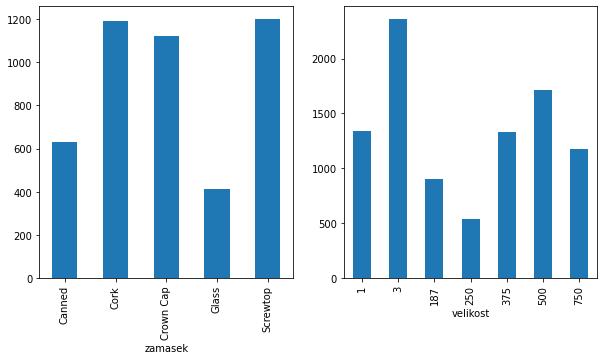

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
vina.groupby('zamasek').mean()['popularnost'].plot.bar();

plt.subplot(1, 2, 2)
vina.groupby('velikost').mean()['popularnost'].plot.bar();

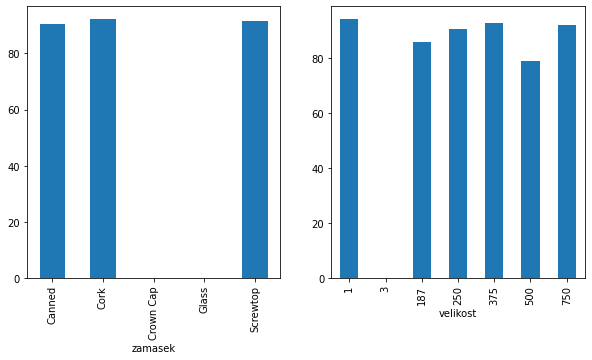

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
vina.groupby('zamasek').mean()['ocena'].plot.bar();

plt.subplot(1, 2, 2)
vina.groupby('velikost').mean()['ocena'].plot.bar();

### Vina skozi leta

<AxesSubplot:title={'center':'Povprečcna ocena skozi leta'}, xlabel='leto'>

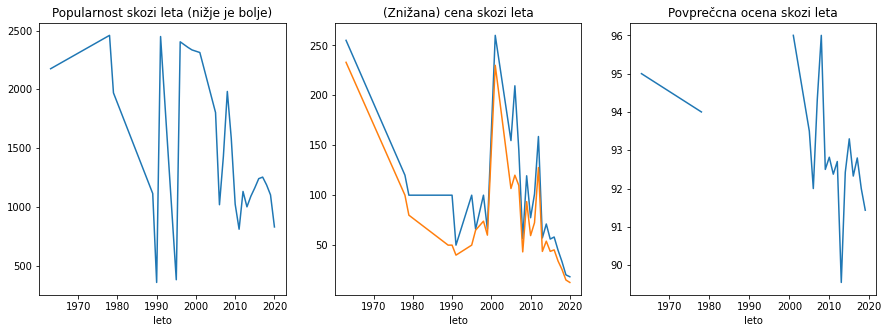

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
vina.groupby('leto').mean()['popularnost'].plot(title='Popularnost skozi leta (nižje je bolje)')

plt.subplot(1, 3, 2)
vina.groupby('leto').mean()['cena'].plot(title='(Znižana) cena skozi leta')
vina.groupby('leto').mean()['znizana_cena'].plot()

plt.subplot(1, 3, 3)
vina.groupby('leto').mean()['ocena'].plot(title='Povprečcna ocena skozi leta')

In [11]:
vina.groupby('leto').size()

leto
1963.0      1
1978.0      1
1979.0      2
1989.0      1
1990.0      1
1991.0      1
1995.0      1
1996.0      1
1998.0      1
1999.0      1
2001.0      1
2005.0      3
2006.0      2
2007.0      4
2008.0      4
2009.0      7
2010.0     14
2011.0     18
2012.0     22
2013.0     46
2014.0     84
2015.0    164
2016.0    315
2017.0    444
2018.0    563
2019.0    301
2020.0      3
dtype: int64

Vidimo, da so vsi grafi precej zobati, zato težko naredimo kakšen konkreten sklep. Iz preštetih vin po letih vidimo tudi, da nimamo najboljšega vzorca. 

Vidimo pa lahko, da je cena vin iz 2000-2010 najvišja in da so starejša vina v povprečju bolje ocenjena.

### Popularnost po barvah

Za začetek si enostavno poglejmo, ali ljudje preferirajo belo ali rdeče vino:

In [12]:
# količina vin posamezne barve
vina.groupby('barva').size()

barva
Mixed        3
Orange       6
Red       1297
Rose       127
White      832
dtype: int64

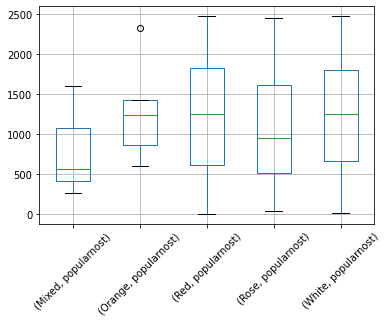

In [13]:
# očitno se pojavi nek problem s podvojitvami indeksov
vina.loc[~vina.index.duplicated(keep='first')].groupby('barva').boxplot(
    column='popularnost', subplots=False, rot=45);

Vidimo, da se med 2265 najbolj popularnimi vini največkrat pojavijo rdeča. Na grafu pa vidimo, da so najbolj popularna mešana - a to v kombinaciji s tabelo ni relevantno, saj je mešanih vin precej malo. V povprečju najbolj popularna sorta je očitno rosé. 

Vseeno rdeče vino premaga belo, zato lahko ovržemo hipotezo, da je belo vino najbolj popularno, ta prestol očitno pripada rdečemu vinu, če gledamo količinsko oz. rose-ju, če se osredotočimo na povprečja (težko bi argumentirali za mešano ali oranžno, saj je teh vnosov precej malo - mali razpon na grafu je tudi torej posledica tega).

### Sorte

<Figure size 720x360 with 0 Axes>

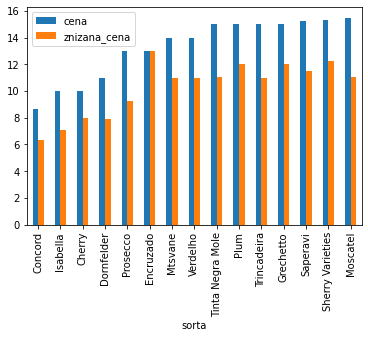

In [14]:
plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
vina.groupby('sorta').mean().sort_values('cena').head(15).plot.bar(y=['cena', 'znizana_cena']);

#plt.subplot(1, 2, 2)
#vina.groupby('sorta').mean().sort_values('cena').tail(15).plot.bar(y='cena');

### Države, regije in podregije

### Popularnost in ocene

Poglejmo si, če obstaja kakšna povezava med popoularnostjo vina in njegovo oceno. Naša hipoteza je, da najbolj
popualrna vina niso tista, ki so najbolje ocenjena (in obratno).

<AxesSubplot:xlabel='cena', ylabel='popularnost'>

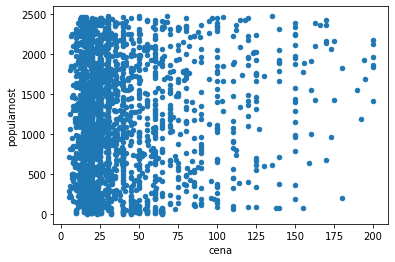

In [15]:
# popularnost v odvisnosti od cene
vina[vina.cena < 200].plot.scatter(x='cena', y='popularnost')

### Okusi in vonjave

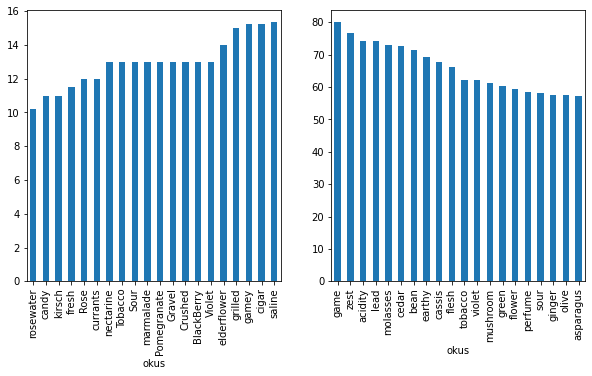

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
master.groupby('okus').mean().sort_values('cena').head(20)['cena'].plot.bar();

plt.subplot(1, 2, 2)
master.groupby('okus').mean().sort_values('cena', ascending=False).head(20)['cena'].plot.bar();

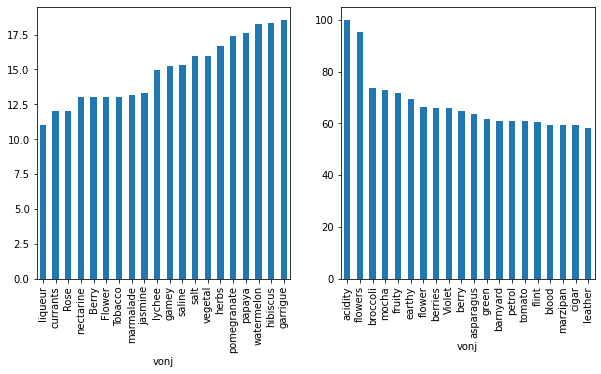

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
master.groupby('vonj').mean().sort_values('cena').head(20)['cena'].plot.bar();

plt.subplot(1, 2, 2)
master.groupby('vonj').mean().sort_values('cena', ascending=False).head(20)['cena'].plot.bar();

## Klasifikacija barve iz opisa

Za konec si poglejmo, kako dobro lahko napovemo barvo vina iz njegovega opisa. Za ta namen bomo uporabili naivni Bayesov klasifikator, ki smo ga spoznali na predavanjih.

IDEJE: mogoče kaj z deskriptorji okusa in vonja, državami, ...

In [18]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    niz = str(niz)
    return pd.Series(sorted({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

In [19]:
verjetnosti_barv = vina.groupby('barva').size() / len(vina)
verjetnosti_barv.sort_values()

barva
Mixed     0.001325
Orange    0.002649
Rose      0.056071
White     0.367329
Red       0.572627
dtype: float64

In [20]:
koreni_vin = vina.opis.apply(
    koreni_besed
).stack(
).reset_index(
    level='id'
).rename(columns={
    'id': 'vino',
    0: 'koren',
})

koreni_barv = pd.merge(koreni_vin, vina.barva, left_on='vino', right_on='id')[['koren', 'barva']]
pojavitve_korenov_po_barvah = pd.crosstab(koreni_barv.koren, koreni_barv.barva)
verjetnosti_korenov_po_barvah = pojavitve_korenov_po_barvah / vina.groupby('barva').size() + 0.001

verjetnosti_korenov_po_barvah.White.sort_values(ascending=False).head(20)

koren
an        0.931288
th        0.886817
          0.885615
of        0.844750
with      0.718548
win       0.595952
in        0.545471
t         0.473356
on        0.462538
winery    0.401240
$         0.390423
it        0.378404
fruit     0.376000
from      0.368788
not       0.360375
ar        0.356769
for       0.318308
that      0.314702
flavor    0.297875
finish    0.293067
Name: White, dtype: float64

In [21]:
def doloci_barvo(opis):
    faktorji_barv = verjetnosti_barv * verjetnosti_korenov_po_barvah[
        verjetnosti_korenov_po_barvah.index.isin(
            koreni_besed(opis)
        )
    ].prod()
    faktorji_barv /= max(faktorji_barv)
    return faktorji_barv.sort_values(ascending=False).head(5)

In [22]:
doloci_barvo('This fine wine overtakes the senses, even sight, with it\'s magnificant colour.')

barva
Red       1.000000e+00
White     3.845975e-01
Rose      1.659647e-02
Orange    4.231503e-07
Mixed     8.420927e-10
dtype: float64

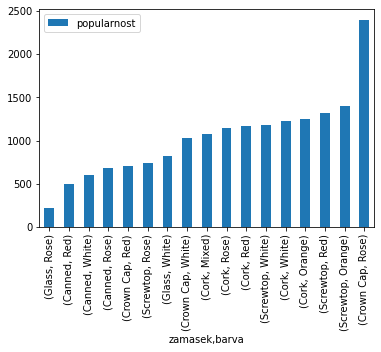

In [23]:
vina.groupby(['zamasek', 'barva']).mean().sort_values('popularnost').plot.bar(y='popularnost');